# Task 1 - Clustering

## Class: Computational Intelligence / Kecerdasan Komputasional - B

### Name: Kurnia Cahya Febryanto
### NRP: 6025241065

## Table of Contents

1. [Purpose](#purpose)
2. [Install Required Libraries](#install-required-libraries)
3. [Load Dataset](#load-dataset)
4. [Data Preprocessing](#data-preprocessing)
5. [Clustering Algorithms](#clustering-algorithms)
   - [K-Means Clustering](#k-means-clustering)
   - [Agglomerative Clustering](#agglomerative-clustering)
6. [Additional Analysis](#additional-analysis)
   - [Elbow Method for Optimal K](#elbow-method-for-optimal-k)
   - [Dendrogram for Agglomerative Clustering](#dendrogram-for-agglomerative-clustering)
   - [Cluster Size Distributions](#cluster-size-distributions)
   - [Cluster Interpretability](#cluster-interpretability)
7. [Performance Evaluation](#performance-evaluation)
8. [Visualization of Clusters](#visualization-of-clusters)
9. [Conclusion](#conclusion)

## Purpose

The primary goal of clustering in this task is to group patients from the HCV dataset into distinct clusters based on their laboratory and demographic data. This clustering analysis will help **identify potential groupings**, such as distinguishing between healthy individuals (blood donors) and patients at different stages of Hepatitis C progression (e.g., Hepatitis, Fibrosis, Cirrhosis).


In this task use two clustering algorithms, **K-Means** and **Agglomerative Clustering**, and compare their performance based on metrics such as the **Sum of Squared Errors (SSE)** and the **Silhouette Coefficient**.

## Install Required Libraries

Libraries:

*   Pandas </br>
For data manipulation and analysis, specifically used to load and manage the HCV dataset in a tabular format.

*   Numpy </br>
Provides support for numerical operations on arrays and matrices, which helps in preparing data for clustering.

*   Matplotlib </br>
A powerful library for creating visual representations of the clustered data.

*   Scikit-Learn </br>
Contains the machine learning algorithms we will use for clustering, including K-Means and Agglomerative Clustering, and tools for performance evaluation (e.g., Silhouette Score).

In [ ]:
!pip install pandas numpy matplotlib scikit-learn ucimlrepo

## Load Dataset

The HCV dataset is loaded directly from the UCI Machine Learning Repository using the `ucimlrepo` package.

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI repository using its ID
hcv_data = fetch_ucirepo(id=571)

# Data as pandas DataFrames
X = hcv_data.data.features  # Features of the dataset
y = hcv_data.data.targets   # Target variable (e.g., labels)

# Display metadata about the dataset
print(hcv_data.metadata)

# Display variable information
print(hcv_data.variables)

{'uci_id': 571, 'name': 'HCV data', 'repository_url': 'https://archive.ics.uci.edu/dataset/571/hcv+data', 'data_url': 'https://archive.ics.uci.edu/static/public/571/data.csv', 'abstract': 'The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 615, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['Category'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5D612', 'creators': ['Ralf Lichtinghagen', 'Frank Klawonn', 'Georg Hoffmann'], 'intro_paper': {'title': 'Using machine learning techniques to generate laboratory diagnostic pathways—a case study', 'authors': 'Georg F. Hoffmann, A. Bietenbeck, R. Lichtinghagen, F. Kla

#### Datasets Description


*   `X` DataFrame </br>
Contains the features (laboratory and demographic values).

*   `Y` Dataframe </br>
Contains the target variable (e.g., blood donors, Hepatitis C patients).

*   The dataset has 12 features and 615 instances.

## Data Preprocessing

Before applying clustering algorithms, the data must be preprocessed. This step includes handling missing values and standardizing the features to ensure uniform scaling across all data points.

In [ ]:
# Check for missing values in the dataset
print(X.isnull().sum())

# Drop non-numeric columns (e.g., 'Sex', 'Category' if present)
X_numeric = X.drop(columns=['Sex'])

# Fill missing values with the mean of the respective columns
X_numeric.fillna(X_numeric.mean(), inplace=True)

# Standardize the numeric data for better clustering performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Display the first few rows of the preprocessed data
print(X_scaled[:5])

Age      0
Sex      0
ALB      1
ALP     18
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
CGT      0
PROT     1
ALT      1
dtype: int64
[[-1.53361617 -0.54064724 -0.61600357 -0.38369306 -0.19823566 -0.57473353
  -1.9046761   0.49707027 -0.50228619 -0.56437244 -0.81605387]
 [-1.53361617 -0.54064724  0.07868215 -0.30505715 -0.38137514  1.34916073
  -0.50607798 -0.14658961 -0.43820313  0.82610164 -0.41099242]
 [-1.53361617  0.91485031  0.25040222  0.5387666  -0.26945657  0.29192639
  -0.14974725  0.09478284 -0.11595686  1.34521196  0.30474722]
 [-1.53361617  0.27373829 -0.63551721 -0.36857077  0.38170602 -0.39323407
  -0.55952759 -0.02590339 -0.10497119  0.6777844   0.08451964]
 [-1.53361617 -0.41935578  0.22698584 -0.30203269 -0.0914043   0.43258847
  -0.93367486 -0.10636087 -0.17637803 -0.61999141  0.16317234]]


## Clustering Algorithms

After preprocessing, apply two clustering algorithms:

1.   K-Means
2.   Agglomerative Clustering



### K-Means Clustering

K-Means is applied first. It partitions the dataset into clusters by minimizing the within-cluster variance, and assigns each data point to the nearest cluster center.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate performance metrics
kmeans_sse = kmeans.inertia_  # Sum of Squared Errors (SSE)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-Means SSE: {kmeans_sse}")
print(f"K-Means Silhouette Coefficient: {kmeans_silhouette}")


K-Means SSE: 5186.424206360771
K-Means Silhouette Coefficient: 0.1329588051688298


*   **SSE** </br>
Measures how well the clusters are formed (lower values indicate tighter clusters).

*   **Silhouette Coefficient** </br>
Measures how well each point lies within its cluster (values closer to 1 indicate better-defined clusters).



### Agglomerative Clustering

Agglomerative Clustering follows a hierarchical approach to clustering by iteratively merging or splitting clusters based on similarity.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Calculate performance metrics
agg_silhouette = silhouette_score(X_scaled, agg_labels)

print(f"Agglomerative Clustering Silhouette Coefficient: {agg_silhouette}")

Agglomerative Clustering Silhouette Coefficient: 0.5021882727507865


## Additional Analysis

### Elbow Method for Optimal K

The **Elbow Method** helps determine the optimal number of clusters for K-Means by plotting SSE for different numbers of clusters.

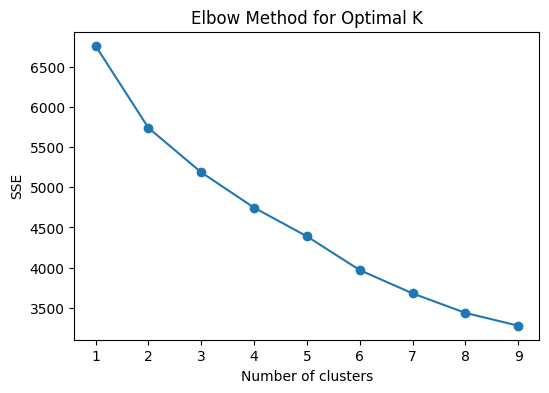

In [ ]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Dendrogram for Agglomerative Clustering

A dendrogram visually shows the hierarchy of cluster mergers in Agglomerative Clustering, helping understand cluster relationships.

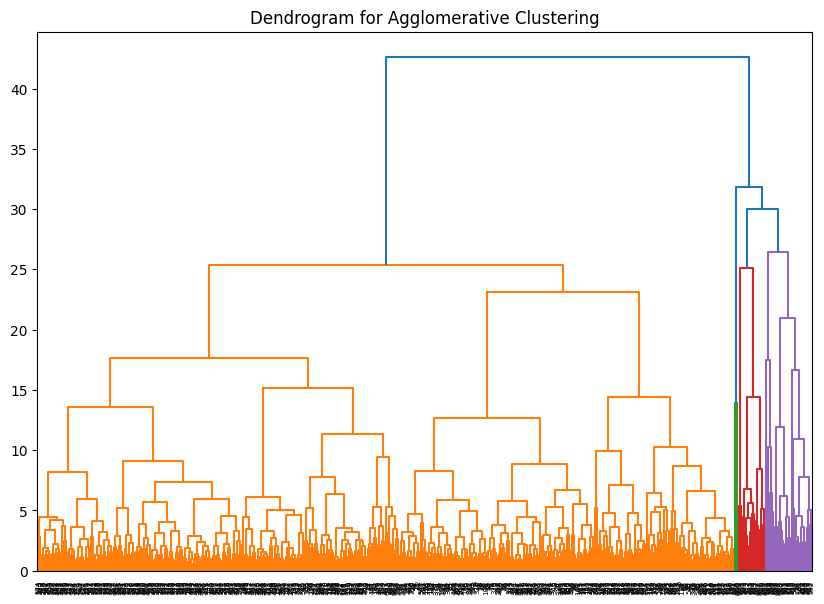

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering to produce the linkage matrix
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

### Cluster Size Distributions

Check the size of each cluster to understand the balance between them.

In [ ]:
import numpy as np

# K-Means cluster sizes
unique, counts = np.unique(kmeans_labels, return_counts=True)
print(f"K-Means Cluster Sizes: {dict(zip(unique, counts))}")

# Agglomerative Clustering cluster sizes
unique, counts = np.unique(agg_labels, return_counts=True)
print(f"Agglomerative Clustering Cluster Sizes: {dict(zip(unique, counts))}")


K-Means Cluster Sizes: {0: 322, 1: 269, 2: 24}
Agglomerative Clustering Cluster Sizes: {0: 59, 1: 553, 2: 3}


### Cluster Interpretability

Understanding the cluster centroids in K-Means can give insights into what features (e.g., ALT, AST) contribute the most to specific clusters.

In [ ]:
# K-Means centroids
print("K-Means Centroids:\n", kmeans.cluster_centers_)

K-Means Centroids:
 [[ 0.83002311 -0.0450289   0.27272075 -0.23529949 -0.18655697  0.29846427
   0.75011332 -0.07810342 -0.081415    0.01424419 -0.08371681]
 [-0.16761266  0.06103011 -0.34733542  1.98122444  0.02297016  0.04846677
  -0.46804585 -0.1569936   0.72248956  0.59978999  2.49102127]
 [-0.60243041  0.74369458 -0.05528212 -0.14434082 -0.05438073  0.64469075
   0.07415908  0.05100056 -0.10134999  0.60238981  0.05115778]
 [-0.27286586 -1.32037807  3.03434873 -0.1336712  -0.12192755 -1.04663212
  -0.99900216 12.33773021  1.41837482 -1.91776721 -1.01006388]
 [ 1.07414632 -2.63725681  0.03633754  0.51835151  0.25325402 -1.50174201
  -1.46995261 -0.30549315  0.40091884 -2.50547426 -0.26410849]
 [ 0.84411468 -0.99308365  2.29456481  5.25288833  1.33640534 -1.76607581
  -0.83073487  0.041815    5.10142186 -0.03496231 -0.41405114]
 [-0.39971076 -0.24464629 -0.37324006 -0.31065491 -0.1387069  -0.58140188
  -0.50777007 -0.11634027 -0.30880288 -0.34394517 -0.34241013]
 [ 0.30774284 -2.2445

## Performance Evaluation

To compare the performance of the two algorithms, both the SSE and Silhouette Coefficient are evaluated side by side.

In [ ]:
# Performance comparison
print(f"K-Means SSE: {kmeans_sse}")
print(f"K-Means Silhouette Coefficient: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Coefficient: {agg_silhouette}")


K-Means SSE: 5186.424206360771
K-Means Silhouette Coefficient: 0.1329588051688298
Agglomerative Clustering Silhouette Coefficient: 0.5021882727507865


Performance Summary

*   K-Means </br>
The SSE and Silhouette Coefficient provide insight into how well the algorithm was able to group the data into clusters.

*   Agglomerative Clustering </br>
The Silhouette Coefficient shows how well the hierarchical clustering method performed compared to K-Means.



## Visualization of Clusters

For better understanding of the clustering results, the dataset is visualized using Principal Component Analysis (PCA) to reduce the dimensionality to two dimensions. This allows for plotting the clusters and visually inspecting the results of both algorithms.

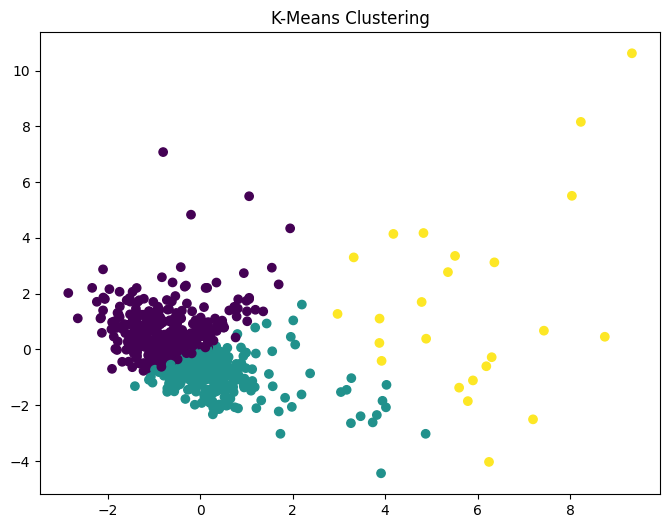

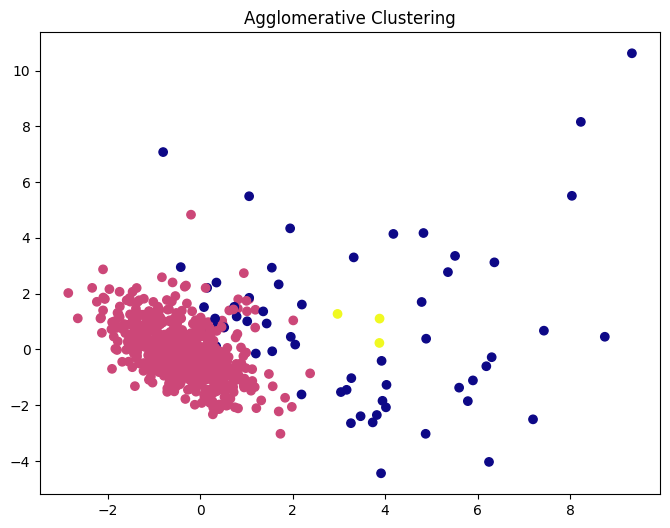

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Plot Agglomerative Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.show()

Explanation:

*   PCA </br>
The dimensionality of the dataset is reduced to two principal components for easy visualization.

*   Cluster Visualization </br>
The scatter plots show the data points assigned to each cluster, with each color representing a different cluster for both K-Means and Agglomerative Clustering.



## Conclusion

### Purpose Review:

The objective of this clustering task was to group patients from the HCV dataset into distinct clusters based on their laboratory and demographic data. The clustering aimed to differentiate healthy individuals (blood donors) from patients at various stages of Hepatitis C progression (Hepatitis, Fibrosis, Cirrhosis).

### Result

- **K-Means Clustering** </br>
  - Produced clusters with a SSE of 5186.42, which indicates the within-cluster variance (a lower SSE is generally better).
  - The Silhouette Coefficient was 0.1329, which is relatively low, suggesting that the clusters are not well-separated. There could be overlaps between the clusters, meaning that many data points may not be clearly assigned to a single cluster.

- **Agglomerative Clustering** </br>
  - Exhibited a much higher Silhouette Coefficient of 0.5021, indicating more clearly separated and coherent clusters.
  - This suggests that Agglomerative Clustering performed better at distinguishing between different groups of patients, aligning better with the goal of identifying distinct stages of Hepatitis C.

### Summary

- **Agglomerative Clustering performed better** in terms of the Silhouette Coefficient, indicating it was more successful at forming well-defined clusters, aligning with the purpose of grouping patients based on their disease progression.

- K-Means Clustering, although widely used for such tasks, did not perform as well for this dataset. The low Silhouette Coefficient indicates that the clusters were not as distinct, making it harder to differentiate between patient categories like blood donors and those at different stages of Hepatitis C progression.